In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
train_feat = np.load("datasets/train/train_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']

valid_feat = np.load("datasets/valid/valid_feature.npz", allow_pickle=True)
valid_feat_X = valid_feat['features']
valid_feat_Y = valid_feat['label']

test_feat = np.load("datasets/test/test_feature.npz", allow_pickle=True)
test_feat_X = test_feat['features']

In [3]:
def max_pooling_embeddings(embeddings):
    return np.max(embeddings, axis=0)

In [4]:
train_feat_X_max = np.array([max_pooling_embeddings(feat) for feat in train_feat_X])
valid_feat_X_max = np.array([max_pooling_embeddings(feat) for feat in valid_feat_X])

In [5]:
scaler = StandardScaler()
train_feat_X_max = scaler.fit_transform(train_feat_X_max)
valid_feat_X_max = scaler.transform(valid_feat_X_max)

Accuracy with 20% training data: 0.48
Accuracy with 40% training data: 0.48
Accuracy with 60% training data: 0.46
Accuracy with 80% training data: 0.46
Accuracy with 100% training data: 0.46


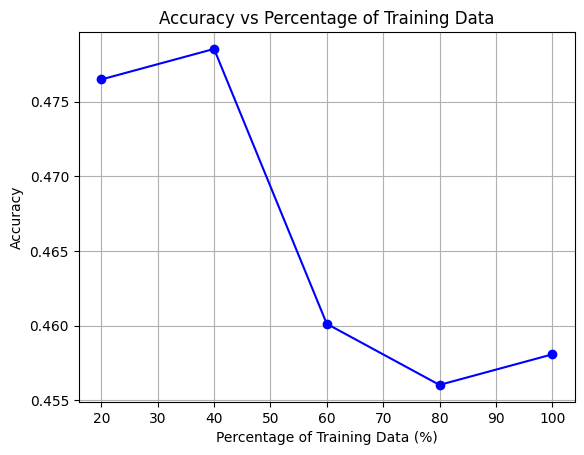

In [6]:
percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
accuracies = []

for percentage in percentages:
    n_samples = int(len(train_feat_X_max) * percentage)
    
    x_train_subset = train_feat_X_max[:n_samples]
    y_train_subset = train_feat_Y[:n_samples]
    
    class_prototypes = [
        np.mean(x_train_subset[np.array(y_train_subset) == 0], axis=0),
        np.mean(x_train_subset[np.array(y_train_subset) == 1], axis=0)
    ]
    
    predicted_labels = [
        0 if np.argmin(np.linalg.norm(sample - class_prototypes, axis=1)) == 0 else 1 
        for sample in valid_feat_X_max
    ]
    
    accuracy = accuracy_score(valid_feat_Y, predicted_labels)
    accuracies.append(accuracy)
    print(f"Accuracy with {percentage * 100:.0f}% training data: {accuracy:.2f}")

plt.plot([p * 100 for p in percentages], accuracies, marker='o', color='b', label='Accuracy')
plt.title('Accuracy vs Percentage of Training Data')
plt.xlabel('Percentage of Training Data (%)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()